In [70]:
import torch
import polars as pl 
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.io as pio

%load_ext autoreload
%autoreload 2

if torch.cuda.is_available():
    print("Using CUDA")
    device = torch.device('cuda')
else:
    print("Using CPU")
    device = torch.device('cpu')

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Using CUDA


In [71]:
data_df = pl.read_csv("data/google_stock_price_train_yfinance.csv")

data_df

Close,High,Low,Open,Volume,Date,Open_s,High_s,Low_s,Close_s,Volume_s
f64,f64,f64,f64,i64,str,f64,f64,f64,f64,f64
2.499133,2.591785,2.390042,2.490664,897427216,"""2004-08-19""",-1.60523,-1.602328,-1.608212,-1.604091,4.281968
2.697639,2.716817,2.503118,2.51582,458857488,"""2004-08-20""",-1.602471,-1.588694,-1.595726,-1.582314,1.698872
2.724787,2.826406,2.71607,2.758411,366857939,"""2004-08-23""",-1.575869,-1.576745,-1.572211,-1.579336,1.157011
2.61196,2.779581,2.579581,2.770615,306396159,"""2004-08-24""",-1.574531,-1.58185,-1.587282,-1.591713,0.800902
2.640104,2.689918,2.587302,2.614201,184645512,"""2004-08-25""",-1.591683,-1.591627,-1.58643,-1.588626,0.083813
…,…,…,…,…,…,…,…,…,…,…
39.953499,40.348999,39.816002,40.317001,32954000,"""2016-10-26""",2.542764,2.514772,2.524529,2.504705,-0.809622
39.767502,40.1745,39.575001,40.049999,54984000,"""2016-10-27""",2.513484,2.495744,2.497916,2.484301,-0.67987
39.768501,40.774502,39.679501,40.4175,85398000,"""2016-10-28""",2.553784,2.561169,2.509456,2.484411,-0.500737


In [72]:
import numpy as np

# 3 day percent change
three_day_change = (data_df['Close'].shift(-3).alias("3_day_price_diff") - data_df['Close']) / data_df['Close']
print(three_day_change.min(), three_day_change.max(), three_day_change.mean(), three_day_change.median())

data_df = data_df.with_columns(
    three_day_change,
)

data_df

-0.14482663815788502 0.3339028177965871 0.003234915979787474 0.0032746017798223623


Close,High,Low,Open,Volume,Date,Open_s,High_s,Low_s,Close_s,Volume_s,3_day_price_diff
f64,f64,f64,f64,i64,str,f64,f64,f64,f64,f64,f64
2.499133,2.591785,2.390042,2.490664,897427216,"""2004-08-19""",-1.60523,-1.602328,-1.608212,-1.604091,4.281968,0.045146
2.697639,2.716817,2.503118,2.51582,458857488,"""2004-08-20""",-1.602471,-1.588694,-1.595726,-1.582314,1.698872,-0.021328
2.724787,2.826406,2.71607,2.758411,366857939,"""2004-08-23""",-1.575869,-1.576745,-1.572211,-1.579336,1.157011,-0.01362
2.61196,2.779581,2.579581,2.770615,306396159,"""2004-08-24""",-1.574531,-1.58185,-1.587282,-1.591713,0.800902,0.012205
2.640104,2.689918,2.587302,2.614201,184645512,"""2004-08-25""",-1.591683,-1.591627,-1.58643,-1.588626,0.083813,-0.037641
…,…,…,…,…,…,…,…,…,…,…,…
39.953499,40.348999,39.816002,40.317001,32954000,"""2016-10-26""",2.542764,2.514772,2.524529,2.504705,-0.809622,-0.018184
39.767502,40.1745,39.575001,40.049999,54984000,"""2016-10-27""",2.513484,2.495744,2.497916,2.484301,-0.67987,-0.014761
39.768501,40.774502,39.679501,40.4175,85398000,"""2016-10-28""",2.553784,2.561169,2.509456,2.484411,-0.500737,null


In [73]:
idx = int(len(data_df) * 0.85)
train_df = data_df.slice(0, idx)
val_df = data_df.slice(idx)

print(f"Train size: {len(train_df)}")
print(f"Validation size: {len(val_df)}")

Train size: 2612
Validation size: 462


In [74]:
select = ["Close_s", "Open_s", "High_s", "Low_s", "Volume_s"]

train_input = (
    torch.tensor(train_df.select(select).rows(), dtype=torch.float32)
    .unsqueeze(0)
    .to(device)
)
print(train_input.shape)

val_input = (
    torch.tensor(val_df.select(select).rows(), dtype=torch.float32)
    .unsqueeze(0)
    .to(device)
)
print(val_input.shape)  

torch.Size([1, 2612, 5])
torch.Size([1, 462, 5])


In [75]:
from torch.utils.data import DataLoader
from utils.dataset import StockDataset


train_dataset = StockDataset(train_input.squeeze(), window_steps=30, label_steps=3)
print(len(train_dataset))
print(train_dataset[0][0].shape)
print(train_dataset[0][1].shape)

val_dataset = StockDataset(val_input.squeeze(), window_steps=30, label_steps=3)
print(len(val_dataset))


2579
torch.Size([30, 5])
torch.Size([3, 5])
429


#### LSTM Last Output

In [145]:
from utils.early_stopping import EarlyStopping
from utils.training3 import Trainer
from utils.models import LSTMUsingOutput


lstm_with_output = LSTMUsingOutput(5, 100, 5, 1).to(device)
lr = 0.0001
criterion = torch.nn.L1Loss()
optimizer = torch.optim.Adam(lstm_with_output.parameters(), lr=lr, weight_decay=1e-5)
early_stop = EarlyStopping(patience=50, verbose=True, path="checkpoints/lstm_with_output.pt")

name = f"LSTM LO - {lstm_with_output.hidden_size}HU - {lstm_with_output.num_layers}L - {lr}LR - {criterion.__class__.__name__}"

lstm_with_output_trainer = Trainer(
    name,
    lstm_with_output,
    DataLoader(train_dataset, batch_size=16, shuffle=True),
    DataLoader(val_dataset, batch_size=16),
    optimizer,
    criterion,
    early_stop,
)

In [146]:
lstm_with_output_trainer.fit(2000)

  0%|          | 0/2000 [00:00<?, ?it/s]

Validation loss decreased (inf --> 35.880295).  Saving model ...
Epoch [1/2000]  LR: 0.00010  T_Loss: 0.4914   V_Loss: 35.8803
Validation loss decreased (35.880295 --> 18.086806).  Saving model ...
Epoch [2/2000]  LR: 0.00010  T_Loss: 0.2090   V_Loss: 18.0868
Validation loss decreased (18.086806 --> 12.222309).  Saving model ...
Epoch [3/2000]  LR: 0.00010  T_Loss: 0.1272   V_Loss: 12.2223
Validation loss decreased (12.222309 --> 10.751178).  Saving model ...
Epoch [4/2000]  LR: 0.00010  T_Loss: 0.1115   V_Loss: 10.7512
Validation loss decreased (10.751178 --> 9.946427).  Saving model ...
Epoch [5/2000]  LR: 0.00010  T_Loss: 0.1082   V_Loss: 9.9464
Validation loss decreased (9.946427 --> 9.739767).  Saving model ...
Epoch [6/2000]  LR: 0.00010  T_Loss: 0.1057   V_Loss: 9.7398
Validation loss decreased (9.739767 --> 9.073608).  Saving model ...
Epoch [7/2000]  LR: 0.00010  T_Loss: 0.1037   V_Loss: 9.0736
Validation loss decreased (9.073608 --> 8.523243).  Saving model ...
Epoch [8/2000]

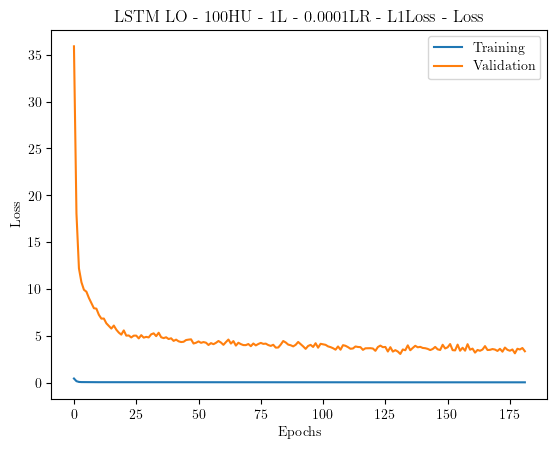

In [147]:
lstm_with_output_trainer.plot()

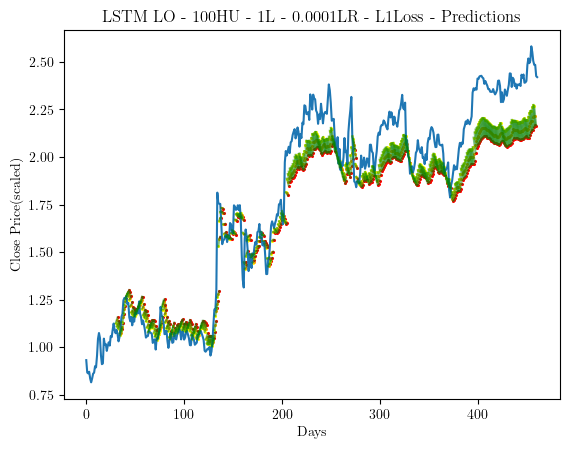

In [148]:
import numpy as np

all_inputs, _, all_predictions = lstm_with_output_trainer.infer(DataLoader(val_dataset, batch_size=128))

colours = ["yellow", "orange", "red"]

plt.plot(val_df["Close_s"], label="True")

for i in range(0, all_predictions.shape[0]):
    for j, p in enumerate(all_predictions[i, :, 0]):
        plt.scatter([all_inputs.shape[1] + i + j], [p], c=colours[j], s=1.5)

    plt.plot(
        range(
            all_inputs.shape[1] + i, all_inputs.shape[1] + i + all_predictions.shape[1]
        ),
        all_predictions[i, :, 0],
        c="green",
        alpha=0.5,
    )

plt.xlabel("Days")
plt.ylabel("Close Price(scaled)")

plt.title(lstm_with_output_trainer.name + " - Predictions")
plt.savefig(f"docs/plots/{lstm_with_output_trainer.name}-predictions.pdf", format="pdf", dpi=300)
plt.show()

In [149]:
from utils.strategy import run_strategy

all_inputs, _, all_predictions = lstm_with_output_trainer.infer(DataLoader(val_dataset, batch_size=128))

print(all_inputs.shape, all_predictions.shape, val_df['3_day_price_diff'][30:-3].shape)
results = run_strategy(all_inputs[:, :, 0], all_predictions[:, :, 0], val_df['3_day_price_diff'][30:-3])
print(results)

(429, 30, 5) (429, 3, 5) (429,)
{'total_returns': 0.7757488812604704, 'success_rate': 0.48148148148148145, 'total_positive_return_count': 91, 'total_negative_return_count': 98, 'returns': [-0.014433941034823084, -0.012489177917745058, 0.009128881737183141, 0.04431195832677719, 0.04161614864286326, 0.05050839804503949, 0.03269251096892548, 0.02680873229437208, 0.0069835772219249605, -0.010381119379138645, -0.00788317235176305, -0.03531884985988293, -0.029074220916749906, -0.023450846342061887, -0.013855620269839887, 0.0060415876088846, -0.008406685079487058, 0.02225387888022559, 0.006275856945201436, 0.0172826401259298, -0.0012332841929392753, 0.02186411983445353, -0.002810649887868217, -0.006513762975091657, -0.03832053681060102, -0.012088698419309223, -0.012914988298562961, -0.01054087928696711, -0.029889726053690554, -0.020501866550552732, -0.0102109124380999, 0.011353227391686952, 0.007480021658376594, 0.005567802294048228, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.014991102107857781, -0.0

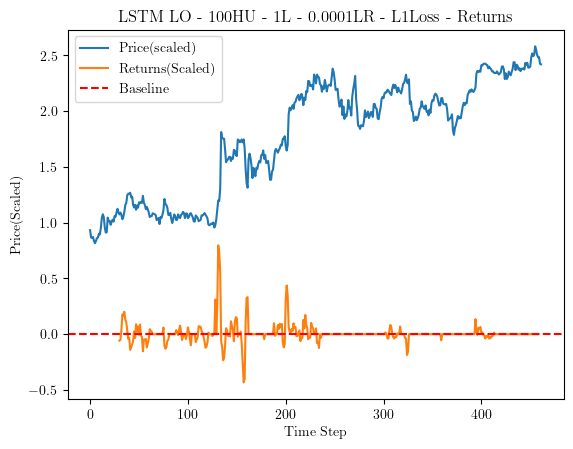

In [150]:
plt.plot(val_df["Close_s"], label="Price(scaled)")
plt.plot(list(range(30, 30 + len(results['returns']))), np.array(results["returns"]) * 4, label="Returns(Scaled)")
plt.axhline(y=0, color='r', linestyle='--', label="Baseline")

plt.xlabel("Time Step")
plt.ylabel("Price(Scaled)")

plt.legend()
plt.title(lstm_with_output_trainer.name + " - Returns")
plt.savefig(f"docs/plots/{lstm_with_output_trainer.name}-returns.pdf", format="pdf", dpi=300)
plt.show()

#### LSTM All Output

In [129]:
from utils.models import LSTMUsingAllOutput


lstm_with_all_output = LSTMUsingAllOutput(5, 20, 5, 1).to(device)
lr = 0.0001
criterion = torch.nn.L1Loss()
optimizer = torch.optim.Adam(lstm_with_all_output.parameters(), lr=lr, weight_decay=1e-5)
early_stop = EarlyStopping(patience=50, verbose=True, path="checkpoints/lstm_with_all_output.pt")

name = f"LSTM AO - {lstm_with_all_output.hidden_size}HU - {lstm_with_all_output.num_layers}L - {lr}LR - {criterion.__class__.__name__}"

lstm_with_all_output_trainer = Trainer(
    name,
    lstm_with_all_output,
    DataLoader(train_dataset, batch_size=16, shuffle=True),
    DataLoader(val_dataset, batch_size=16),
    optimizer,
    criterion,
    early_stop,
)

In [130]:
lstm_with_all_output_trainer.fit(2000)

  0%|          | 0/2000 [00:00<?, ?it/s]

Validation loss decreased (inf --> 38.926364).  Saving model ...
Epoch [1/2000]  LR: 0.00010  T_Loss: 0.6556   V_Loss: 38.9264
Validation loss decreased (38.926364 --> 37.325773).  Saving model ...
Epoch [2/2000]  LR: 0.00010  T_Loss: 0.4876   V_Loss: 37.3258
Validation loss decreased (37.325773 --> 35.417133).  Saving model ...
Epoch [3/2000]  LR: 0.00010  T_Loss: 0.3171   V_Loss: 35.4171
Validation loss decreased (35.417133 --> 33.292388).  Saving model ...
Epoch [4/2000]  LR: 0.00010  T_Loss: 0.2565   V_Loss: 33.2924
Validation loss decreased (33.292388 --> 30.963450).  Saving model ...
Epoch [5/2000]  LR: 0.00010  T_Loss: 0.2240   V_Loss: 30.9634
Validation loss decreased (30.963450 --> 28.842324).  Saving model ...
Epoch [6/2000]  LR: 0.00010  T_Loss: 0.2034   V_Loss: 28.8423
Validation loss decreased (28.842324 --> 27.039353).  Saving model ...
Epoch [7/2000]  LR: 0.00010  T_Loss: 0.1892   V_Loss: 27.0394
Validation loss decreased (27.039353 --> 25.356493).  Saving model ...
Epoc

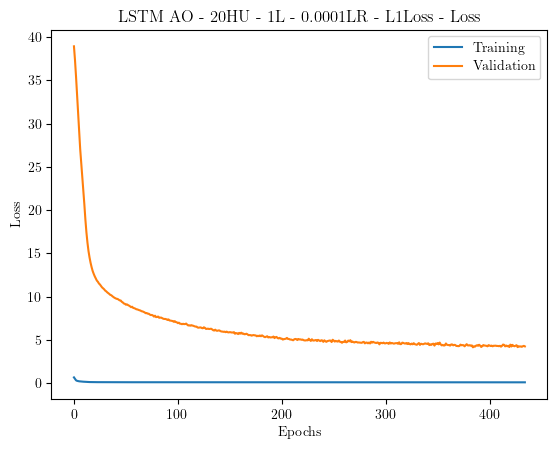

In [131]:
lstm_with_all_output_trainer.plot()

/home/caleb/personal/uni/dlp/a3-rnn-stock-prediction/utils/training3.py:159: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_checkpoint = torch.load(self.early_stop.path)

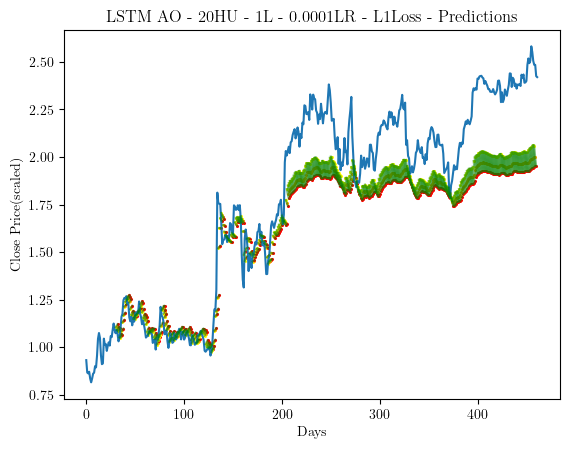

In [132]:
import numpy as np

all_inputs, _, all_predictions = lstm_with_all_output_trainer.infer(DataLoader(val_dataset, batch_size=128))

colours = ["yellow", "orange", "red"]

plt.plot(val_df["Close_s"], label="True")

for i in range(0, all_predictions.shape[0]):
    for j, p in enumerate(all_predictions[i, :, 0]):
        plt.scatter([all_inputs.shape[1] + i + j], [p], c=colours[j], s=1.5)

    plt.plot(
        range(
            all_inputs.shape[1] + i, all_inputs.shape[1] + i + all_predictions.shape[1]
        ),
        all_predictions[i, :, 0],
        c="green",
        alpha=0.5,
    )

plt.xlabel("Days")
plt.ylabel("Close Price(scaled)")

plt.title(lstm_with_all_output_trainer.name + " - Predictions")
plt.savefig(f"docs/plots/{lstm_with_all_output_trainer.name}-predictions.pdf", format="pdf", dpi=300)
plt.show()

In [133]:
from utils.strategy import run_strategy

all_inputs, _, all_predictions = lstm_with_all_output_trainer.infer(DataLoader(val_dataset, batch_size=128))

print(all_inputs.shape, all_predictions.shape, val_df['3_day_price_diff'][30:-3].shape)
results = run_strategy(all_inputs[:, :, 0], all_predictions[:, :, 0], val_df['3_day_price_diff'][30:-3])
print(results)

(429, 30, 5) (429, 3, 5) (429,)
{'total_returns': 0.8384919794532627, 'success_rate': 0.5182481751824818, 'total_positive_return_count': 71, 'total_negative_return_count': 66, 'returns': [-0.014433941034823084, -0.012489177917745058, 0.009128881737183141, 0.04431195832677719, 0.04161614864286326, 0.05050839804503949, 0.03269251096892548, 0.02680873229437208, 0.0069835772219249605, -0.010381119379138645, -0.00788317235176305, -0.03531884985988293, -0.029074220916749906, -0.023450846342061887, -0.013855620269839887, 0.0060415876088846, -0.008406685079487058, 0.02225387888022559, 0.006275856945201436, 0.0172826401259298, -0.0012332841929392753, 0.02186411983445353, -0.002810649887868217, -0.006513762975091657, -0.03832053681060102, -0.012088698419309223, -0.012914988298562961, -0.01054087928696711, -0.029889726053690554, -0.020501866550552732, -0.0102109124380999, 0.011353227391686952, 0.007480021658376594, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.0324648005785685, -0.0285002007318392

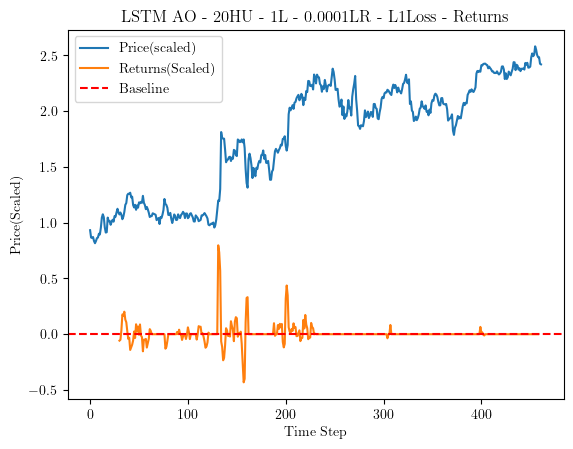

In [134]:
plt.plot(val_df["Close_s"], label="Price(scaled)")
plt.plot(list(range(30, 30 + len(results['returns']))), np.array(results["returns"]) * 4, label="Returns(Scaled)")
plt.axhline(y=0, color='r', linestyle='--', label="Baseline")

plt.xlabel("Time Step")
plt.ylabel("Price(Scaled)")

plt.legend()
plt.title(lstm_with_all_output_trainer.name + " - Returns")
plt.savefig(f"docs/plots/{lstm_with_all_output_trainer.name}-returns.pdf", format="pdf", dpi=300)
plt.show()

### Test

In [125]:
# load test data
test_df = pl.read_csv("data/google_stock_price_test_yfinance.csv")

test_df

Close,High,Low,Open,Volume,Date,Open_s,High_s,Low_s,Close_s,Volume_s
f64,f64,f64,f64,i64,str,f64,f64,f64,f64,f64
38.435001,39.0825,38.172501,38.91,37448000,"""2016-11-02""",2.388473,2.376671,2.343046,2.338124,-0.783153
38.106499,38.497501,37.9515,38.362499,38864000,"""2016-11-03""",2.328435,2.312882,2.318642,2.302087,-0.774813
38.101002,38.518002,37.528049,37.533001,42696000,"""2016-11-04""",2.237473,2.315117,2.271883,2.301484,-0.752244
39.125999,39.259499,38.627499,38.724998,31702000,"""2016-11-07""",2.368186,2.395971,2.393289,2.413928,-0.816996
39.525501,39.781651,39.009499,39.169998,27338000,"""2016-11-08""",2.416985,2.452907,2.435471,2.457753,-0.8427
…,…,…,…,…,…,…,…,…,…,…
48.811001,50.176998,48.505501,48.695,31806000,"""2018-12-24""",3.461485,3.58643,3.484062,3.476386,-0.816384
51.973,52.0,49.150002,49.4505,47466000,"""2018-12-26""",3.544333,3.785213,3.555231,3.823261,-0.724149
52.194,52.1945,49.849998,50.857498,42196000,"""2018-12-27""",3.698623,3.806422,3.632527,3.847505,-0.755189


In [126]:
# 3 day percent change
three_day_change = (test_df['Close'].shift(-3).alias("3_day_price_diff") - test_df['Close']) / test_df['Close']
print(three_day_change.min(), three_day_change.max(), three_day_change.mean(), three_day_change.median())

test_df = test_df.with_columns(
    three_day_change,
)

test_df

-0.09756056843337287 0.06695076003860569 0.0019987986643972794 0.003817883739172889


Close,High,Low,Open,Volume,Date,Open_s,High_s,Low_s,Close_s,Volume_s,3_day_price_diff
f64,f64,f64,f64,i64,str,f64,f64,f64,f64,f64,f64
38.435001,39.0825,38.172501,38.91,37448000,"""2016-11-02""",2.388473,2.376671,2.343046,2.338124,-0.783153,0.017978
38.106499,38.497501,37.9515,38.362499,38864000,"""2016-11-03""",2.328435,2.312882,2.318642,2.302087,-0.774813,0.037238
38.101002,38.518002,37.528049,37.533001,42696000,"""2016-11-04""",2.237473,2.315117,2.271883,2.301484,-0.752244,0.030563
39.125999,39.259499,38.627499,38.724998,31702000,"""2016-11-07""",2.368186,2.395971,2.393289,2.413928,-0.816996,-0.025507
39.525501,39.781651,39.009499,39.169998,27338000,"""2016-11-08""",2.416985,2.452907,2.435471,2.457753,-0.8427,-0.04616
…,…,…,…,…,…,…,…,…,…,…,…
48.811001,50.176998,48.505501,48.695,31806000,"""2018-12-24""",3.461485,3.58643,3.484062,3.476386,-0.816384,0.062342
51.973,52.0,49.150002,49.4505,47466000,"""2018-12-26""",3.544333,3.785213,3.555231,3.823261,-0.724149,-0.003704
52.194,52.1945,49.849998,50.857498,42196000,"""2018-12-27""",3.698623,3.806422,3.632527,3.847505,-0.755189,null


In [127]:
select = ["Close_s", "Open_s", "High_s", "Low_s", "Volume_s"]

test_input = (
    torch.tensor(test_df.select(select).rows(), dtype=torch.float32)
    .unsqueeze(0)
    .to(device)
)
print(test_input.shape)  

torch.Size([1, 543, 5])


In [128]:
test_dataset = StockDataset(test_input.squeeze(), window_steps=30, label_steps=3)
print(len(test_dataset))

510


#### AO

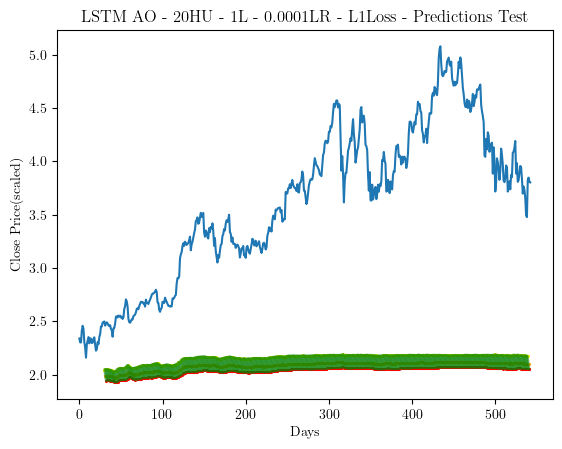

In [143]:
all_inputs, _, all_predictions = lstm_with_all_output_trainer.infer(DataLoader(test_dataset, batch_size=128))

colours = ["yellow", "orange", "red"]

plt.plot(test_df["Close_s"], label="True")

for i in range(0, all_predictions.shape[0]):
    for j, p in enumerate(all_predictions[i, :, 0]):
        plt.scatter([all_inputs.shape[1] + i + j], [p], c=colours[j], s=1.5)

    plt.plot(
        range(
            all_inputs.shape[1] + i, all_inputs.shape[1] + i + all_predictions.shape[1]
        ),
        all_predictions[i, :, 0],
        c="green",
        alpha=0.5,
    )

plt.xlabel("Days")
plt.ylabel("Close Price(scaled)")

plt.title(lstm_with_all_output_trainer.name + " - Predictions Test")
plt.savefig(f"docs/plots/{lstm_with_all_output_trainer.name}-predictions-test.pdf", format="pdf", dpi=300)
plt.show()

In [144]:
from utils.strategy import run_strategy

all_inputs, _, all_predictions = lstm_with_all_output_trainer.infer(DataLoader(test_dataset, batch_size=128))

print(all_inputs.shape, all_predictions.shape, test_df['3_day_price_diff'][30:-3].shape)
results = run_strategy(all_inputs[:, :, 0], all_predictions[:, :, 0], test_df['3_day_price_diff'][30:-3])
print(results)

(510, 30, 5) (510, 3, 5) (510,)


ZeroDivisionError: division by zero

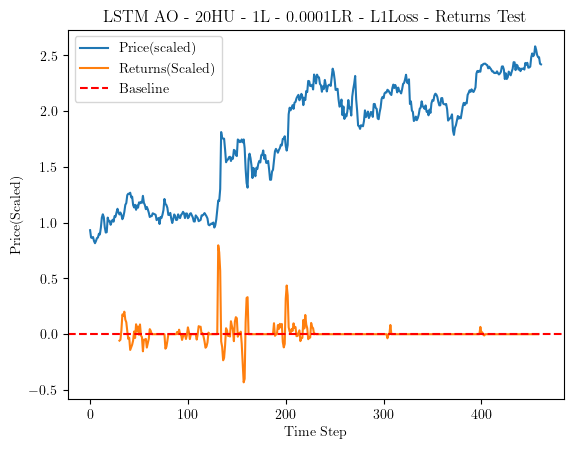

In [137]:
plt.plot(test_df["Close_s"], label="Price(scaled)")
plt.plot(list(range(30, 30 + len(results['returns']))), np.array(results["returns"]) * 4, label="Returns(Scaled)")
plt.axhline(y=0, color='r', linestyle='--', label="Baseline")

plt.xlabel("Time Step")
plt.ylabel("Price(Scaled)")

plt.legend()
plt.title(lstm_with_all_output_trainer.name + " - Returns Test")
plt.savefig(f"docs/plots/{lstm_with_all_output_trainer.name}-returns-test.pdf", format="pdf", dpi=300)
plt.show()

### LO

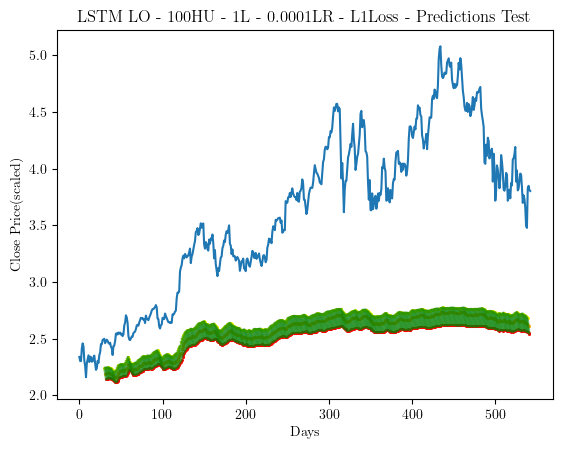

In [151]:
all_inputs, _, all_predictions = lstm_with_output_trainer.infer(DataLoader(test_dataset, batch_size=128))

colours = ["yellow", "orange", "red"]

plt.plot(test_df["Close_s"], label="True")

for i in range(0, all_predictions.shape[0]):
    for j, p in enumerate(all_predictions[i, :, 0]):
        plt.scatter([all_inputs.shape[1] + i + j], [p], c=colours[j], s=1.5)

    plt.plot(
        range(
            all_inputs.shape[1] + i, all_inputs.shape[1] + i + all_predictions.shape[1]
        ),
        all_predictions[i, :, 0],
        c="green",
        alpha=0.5,
    )

plt.xlabel("Days")
plt.ylabel("Close Price(scaled)")

plt.title(lstm_with_output_trainer.name + " - Predictions Test")
plt.savefig(f"docs/plots/{lstm_with_output_trainer.name}-predictions-test.pdf", format="pdf", dpi=300)
plt.show()

In [152]:
from utils.strategy import run_strategy

all_inputs, _, all_predictions = lstm_with_output_trainer.infer(DataLoader(test_dataset, batch_size=128))

print(all_inputs.shape, all_predictions.shape, test_df['3_day_price_diff'][30:-3].shape)
results = run_strategy(all_inputs[:, :, 0], all_predictions[:, :, 0], test_df['3_day_price_diff'][30:-3])
print(results)

(510, 30, 5) (510, 3, 5) (510,)


/home/caleb/personal/uni/dlp/a3-rnn-stock-prediction/utils/training3.py:159: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_checkpoint = torch.load(self.early_stop.path)

ZeroDivisionError: division by zero

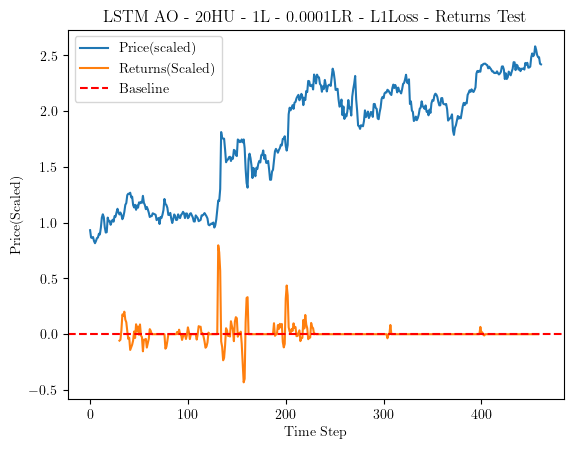

In [ ]:
plt.plot(test_df["Close_s"], label="Price(scaled)")
plt.plot(list(range(30, 30 + len(results['returns']))), np.array(results["returns"]) * 4, label="Returns(Scaled)")
plt.axhline(y=0, color='r', linestyle='--', label="Baseline")

plt.xlabel("Time Step")
plt.ylabel("Price(Scaled)")

plt.legend()
plt.title(lstm_with_output_trainer.name + " - Returns Test")
plt.savefig(f"docs/plots/{lstm_with_output_trainer.name}-returns-test.pdf", format="pdf", dpi=300)
plt.show()